In [2]:
import torch

In [6]:
x = torch.empty(2,2,3) # empty
print(x)

tensor([[[-3.1020e-35,  4.4452e-41, -3.1020e-35],
         [ 4.4452e-41,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 3.2559e-41,  7.7052e+31,  7.2148e+22]]])


In [14]:
x = torch.ones(2,1,2,dtype = torch.float16)
print(x.dtype)
print(x.size())

torch.float16
torch.Size([2, 1, 2])


In [15]:
x = torch.tensor([2,2.4,0.1])

In [16]:
x = torch.rand(2,2)
y = torch.rand(2,2)

In [20]:
z = x+y
print(z)
print(torch.add(x,y))
print(y.add_(x)) #inplace operation over y
print(y)

tensor([[0.9368, 3.6099],
        [2.4066, 1.5436]])
tensor([[0.9368, 3.6099],
        [2.4066, 1.5436]])
tensor([[0.9368, 3.6099],
        [2.4066, 1.5436]])
tensor([[0.9368, 3.6099],
        [2.4066, 1.5436]])


In [22]:
z = x*y
print(z)
print(torch.mul(x,y))
print(y.mul_(x)) #inplace operation over y
print(y)

tensor([[0.1357, 3.5399],
        [1.6874, 0.5409]])
tensor([[0.1357, 3.5399],
        [1.6874, 0.5409]])
tensor([[0.1357, 3.5399],
        [1.6874, 0.5409]])
tensor([[0.1357, 3.5399],
        [1.6874, 0.5409]])


In [28]:
#slicing
x = torch.rand(5,3)
print(x)
print(x[0,2].item()) # using in tensors of one value

tensor([[0.8983, 0.5506, 0.9471],
        [0.4905, 0.8790, 0.4061],
        [0.9928, 0.7343, 0.1892],
        [0.2779, 0.5242, 0.6471],
        [0.7141, 0.2409, 0.6610]])
0.9470951557159424


In [29]:
#reshape
x = torch.rand(4,4)
print(x)
y = x.view(16) # (-1,8)
print(y)
print(y.size())

tensor([[0.8858, 0.6603, 0.5681, 0.4534],
        [0.5731, 0.2417, 0.2399, 0.8198],
        [0.5615, 0.9046, 0.4181, 0.4404],
        [0.4176, 0.7186, 0.2041, 0.6526]])
tensor([0.8858, 0.6603, 0.5681, 0.4534, 0.5731, 0.2417, 0.2399, 0.8198, 0.5615,
        0.9046, 0.4181, 0.4404, 0.4176, 0.7186, 0.2041, 0.6526])
torch.Size([16])


In [36]:
#Numpy to torch
import numpy as np

In [31]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))
# If tensors are in CPU and not in the GPU
#both objects will share the same memory location
# meaning, if you change one, you will affect the other one

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>


In [34]:
a.add_(1) # add 1 to each element of b
print(a)
print(b)

tensor([3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3.]


In [39]:
a = np.ones(4)
print(a)
b = torch.from_numpy(a)
print(b)

a+=1
print(a)
print(b)

[1. 1. 1. 1.]
tensor([1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2.]
tensor([2., 2., 2., 2.], dtype=torch.float64)


In [5]:
# GPU available
if torch.cuda.is_available():
  device = torch.device('cuda')
  x = torch.ones(5,device = device) # crea tensor y lo pasa al gpu
  y = torch.ones(5)
  y = y.to(device) # lo manda al gpu
  z = x * y #lo hace en el gpu
  #z.numpy()#Error!
  z = z.to('cpu') # regresa numpy array to GPU



#Autograd Package

In [ ]:
x = torch.ones(5,requieres_grad = True) #significa que en cualquier momento nosotros podemos calcular los gradiente\
print(x)

In [20]:
x = torch.rand(3, requires_grad = True) #pytorch creara un grafo computacional por nosotros
print(x)

tensor([0.7893, 0.5064, 0.5091], requires_grad=True)


In [21]:
y = x + 2
print(y)
z = y*y*2
#z = z.mean()
print(z)

tensor([2.7893, 2.5064, 2.5091], grad_fn=<AddBackward0>)
tensor([15.5609, 12.5636, 12.5908], grad_fn=<MulBackward0>)


In [25]:
v = torch.tensor([0.1,1.0,0.001],dtype = torch.float32)
z.backward(v) #dz/dx
print(x.grad)

tensor([ 1.1157, 10.0254,  0.0100])


In [ ]:
# Prevenir track grads
#x.requires_grad_(False)
#x.detcah()
#with torch.no_grad():

In [26]:
x.requires_grad_(False)
print(x)

tensor([0.7893, 0.5064, 0.5091])


In [29]:
x = torch.rand(3,requires_grad = True)
#y = x.detach()
#print(y)

tensor([0.8466, 0.4080, 0.3577])


In [31]:
x = torch.rand(3,requires_grad = True)
with torch.no_grad():
  y = x + 2
  print(y)

tensor([2.6327, 2.1720, 2.3940])


Una vez llamamos la funcion backward, el gradiente del tensor se ira acumulando en el atributo grad, entonces el valor se irá sumando.

In [2]:
# dummy train example
weights = torch.ones(4,requires_grad = True)
for epoch in range(3):
  model_outpus = (weights * 3).sum()
  model_outpus.backward() # acumula grads y los guarda en grad
  print(weights.grad)
  weights.grad.zero_() # los gradientes se dejan en zero

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [6]:
weights = torch.ones(4,requires_grad = True)

In [5]:
import torch

In [7]:
optimizer = torch.optim.SGD([weights],lr = 0.01)
optimizer.step()
optimizer.zero_grad()

#Backpropagation


In [1]:
import torch


In [2]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad=True)

In [3]:
#forward pass and compute loss
y_hat = w*x
loss = (y_hat-y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [4]:
#backwardpass
loss.backward()
print(w.grad)

tensor(-2.)


In [ ]:
#update weights
#next forward and backward

#Gradien Descent
#

In [1]:
import numpy as np
import torch

In [3]:
X = np.array([1,2,3,4],dtype = np.float32)
Y = np.array([2,3,6,8],dtype = np.float32)

w = 0.0

def forward(x):
  return w * x
#loss MSE
def loss(y,y_predict):
  return ((y_predict-y)**2).mean()

#gradient
#MSE = 1/N *(wx - y)**2
#dJ/dw = 1/N 2x(wx-y)

def gradient(x,y,y_predict):
  return np.dot(2*x,y_predict-y).mean()

print(f'Pred antes de entranamiento f(5) = {forward(5):.3f}')
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  y_pred = forward(X)
  #print(y_pred)
  l = loss(Y,y_pred)
  dw = gradient(X,Y,y_pred)
  #update weights
  w -= learning_rate*dw
  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')

print(f'Predicción despues de entrenar f(5) = {forward(5):.3f}')

Pred antes de entranamiento f(5) = 0.000
epoch 1: w = 1.160000, loss = 28.25000000
epoch 2: w = 1.624000, loss = 4.70200062
epoch 3: w = 1.809600, loss = 0.93431962
epoch 4: w = 1.883840, loss = 0.33149117
epoch 5: w = 1.913536, loss = 0.23503864
epoch 6: w = 1.925414, loss = 0.21960621
epoch 7: w = 1.930166, loss = 0.21713701
epoch 8: w = 1.932066, loss = 0.21674190
epoch 9: w = 1.932827, loss = 0.21667871
epoch 10: w = 1.933131, loss = 0.21666859
Predicción despues de entrenar f(5) = 9.666


In [28]:
#Mismo codigo anterior con algunas desviaciones
X = torch.tensor([1,2,3,4],dtype = torch.float32)
Y = torch.tensor([2,3,6,8],dtype = torch.float32)

w = torch.tensor(0.0,dtype = torch.float32, requires_grad=True)

def forward(x):
  return w * x
#loss MSE
def loss(y,y_predict):
  return ((y_predict-y)**2).mean()

#gradient
#MSE = 1/N *(wx - y)**2
#dJ/dw = 1/N 2x(wx-y)

#def gradient(x,y,y_predict):
#  return np.dot(2*x,y_predict-y).mean()

print(f'Pred antes de entranamiento f(5) = {forward(5):.3f}')
learning_rate = 0.05
n_iters = 10

for epoch in range(n_iters):
  w.requires_grad = True
  y_pred = forward(X)
  #print(y_pred)
  l = loss(Y,y_pred)
  #print(l)
  #l.retain_grad()

  #manual gradientes automatically
  w.retain_grad()
  l.backward()
  #update weights
  #update manual

  with torch.no_grad():
    w = w - learning_rate*w.grad

  #zero grads to not acummulate

  w.grad = None


  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')

print(f'Predicción despues de entrenar f(5) = {forward(5):.3f}')

Pred antes de entranamiento f(5) = 0.000
epoch 1: w = 1.450000, loss = 28.25000000
epoch 3: w = 1.903125, loss = 0.32617188
epoch 5: w = 1.931445, loss = 0.21709442
epoch 7: w = 1.933215, loss = 0.21666834
epoch 9: w = 1.933326, loss = 0.21666667
Predicción despues de entrenar f(5) = 9.667


In [ ]:
#1) Design modell (imput, output size, forward pass))
#2) Construct loss and optimizer
#3) Training loop
  # - forward pass:
  # - backward pass:
  # - update weights

In [3]:
import torch
import torch.nn as nn

In [9]:
#Mismo codigo anterior con algunas desviaciones
X = torch.tensor([1,2,3,4],dtype = torch.float32)
Y = torch.tensor([2,3,6,8],dtype = torch.float32)

w = torch.tensor(0.0,dtype = torch.float32, requires_grad=True)

def forward(x):
  return w * x
#loss MSE
def loss(y,y_predict):
  return ((y_predict-y)**2).mean()

#gradient
#MSE = 1/N *(wx - y)**2
#dJ/dw = 1/N 2x(wx-y)

#def gradient(x,y,y_predict):
#  return np.dot(2*x,y_predict-y).mean()

print(f'Pred antes de entranamiento f(5) = {forward(5):.3f}')
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr = learning_rate)

for epoch in range(n_iters):
  #w.requires_grad = True
  y_pred = forward(X)
  #print(y_pred)
  l = loss(Y,y_pred)
  #print(l)
  #l.retain_grad()

  #manual gradientes automatically
  #w.retain_grad()
  l.backward()
  #update weights
  optimizer.step()
  #update manual

  #with torch.no_grad():
  #  w = w - learning_rate*w.grad

  #zero grads to not acummulate
  optimizer.zero_grad()



  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')

print(f'Predicción despues de entrenar f(5) = {forward(5):.3f}')

Pred antes de entranamiento f(5) = 0.000
epoch 1: w = 0.290000, loss = 28.25000000
epoch 11: w = 1.609803, loss = 1.30322576
epoch 21: w = 1.869638, loss = 0.25878128
epoch 31: w = 1.920793, loss = 0.21829906
epoch 41: w = 1.930865, loss = 0.21672995
epoch 51: w = 1.932847, loss = 0.21666913
epoch 61: w = 1.933238, loss = 0.21666676
epoch 71: w = 1.933315, loss = 0.21666668
epoch 81: w = 1.933330, loss = 0.21666668
epoch 91: w = 1.933333, loss = 0.21666667
Predicción despues de entrenar f(5) = 9.667


#Construct the model

In [1]:
import torch
import torch.nn as nn

In [10]:
#X = torch.tensor([1,2,3,4],dtype = torch.float32)
#Y = torch.tensor([2,3,6,8],dtype = torch.float32)
#x,y need new shape

X = torch.tensor([[1],[2],[3],[4]],dtype = torch.float32)
Y = torch.tensor([[2],[3],[6],[8]],dtype = torch.float32)

X_test = torch.tensor([5],dtype = torch.float32)
n_samples, n_features = X.shape

#w = torch.tensor(0.0,dtype = torch.float32, requires_grad=True)

#forward model
input_size = n_features
output_size = n_features

model = nn.Linear(input_size,output_size)


print(f'Pred antes de entranamiento f(5) = {model(X_test).item():.3f}')
#training
learning_rate = 0.01
n_iters = 100
#loss provided by torch
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for epoch in range(n_iters):
  y_pred = model(X)
  l = loss(Y,y_pred)
  #manual gradientes
  ##dw = gradient(X,Y,y_pred)
  l.backward()
  #update weights
  #update manual
  #w = w - learning_rate*dw
  optimizer.step()
  #zero grads to not acummulate
  #w.grad.zero_()

  optimizer.zero_grad()
  if epoch % 2 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():3f}, loss = {l:.8f}')

print(f'Predicción despues de entrenar f(5) = {model(X_test).item():.3f}')

Pred antes de entranamiento f(5) = 3.907
epoch 1: w = 0.787241, loss = 8.71775818
epoch 3: w = 1.028611, loss = 4.49845028
epoch 5: w = 1.197051, loss = 2.46448183
epoch 7: w = 1.314883, loss = 1.48271275
epoch 9: w = 1.397591, loss = 1.00757360
epoch 11: w = 1.455924, loss = 0.77638972
epoch 13: w = 1.497336, loss = 0.66269159
epoch 15: w = 1.527002, loss = 0.60558712
epoch 17: w = 1.548513, loss = 0.57575923
epoch 19: w = 1.564359, loss = 0.55909181
epoch 21: w = 1.576269, loss = 0.54878849
epoch 23: w = 1.585442, loss = 0.54157579
epoch 25: w = 1.592710, loss = 0.53587878
epoch 27: w = 1.598652, loss = 0.53093755
epoch 29: w = 1.603668, loss = 0.52638638
epoch 31: w = 1.608036, loss = 0.52204901
epoch 33: w = 1.611949, loss = 0.51784039
epoch 35: w = 1.615542, loss = 0.51371866
epoch 37: w = 1.618906, loss = 0.50966394
epoch 39: w = 1.622107, loss = 0.50566614
epoch 41: w = 1.625190, loss = 0.50172013
epoch 43: w = 1.628185, loss = 0.49782306
epoch 45: w = 1.631114, loss = 0.4939734

#Linear custom module

In [6]:
###Linear custom module


#X = torch.tensor([1,2,3,4],dtype = torch.float32)
#Y = torch.tensor([2,3,6,8],dtype = torch.float32)
#x,y need new shape

X = torch.tensor([[1],[2],[3],[4]],dtype = torch.float32)
Y = torch.tensor([[2],[3],[6],[8]],dtype = torch.float32)

X_test = torch.tensor([5],dtype = torch.float32)
n_samples, n_features = X.shape

#w = torch.tensor(0.0,dtype = torch.float32, requires_grad=True)

#forward model
input_size = n_features
output_size = n_features
#model = nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim,output_dim):
    super(LinearRegression,self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim,output_dim)
  def forward(self,x):
    return self.lin(x)
model = LinearRegression(input_size,output_size)

#gradient
#MSE = 1/N *(wx - y)**2
#dJ/dw = 1/N 2x(wx-y)

def gradient(x,y,y_predict):
  return np.dot(2*x,y_predict-y).mean()

print(f'Pred antes de entranamiento f(5) = {model(X_test).item():.3f}')
#training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(Y,y_pred)
  #manual gradientes
  ##dw = gradient(X,Y,y_pred)
  l.backward()
  #update weights
  #update manual
  #w = w - learning_rate*dw
  optimizer.step()
  #zero grads to not acummulate
  #w.grad.zero_()

  optimizer.zero_grad()
  if epoch % 2 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():3f}, loss = {l:.8f}')

print(f'Predicción despues de entrenar f(5) = {model(X_test).item():.3f}')

Pred antes de entranamiento f(5) = -0.281
epoch 1: w = -0.108418, loss = 0.21666665
epoch 3: w = 0.458168, loss = 22.80607605
epoch 5: w = 0.867526, loss = 12.00848007
epoch 7: w = 1.163288, loss = 6.37206745
epoch 9: w = 1.376975, loss = 3.42982435
epoch 11: w = 1.531365, loss = 1.89395607
epoch 13: w = 1.642911, loss = 1.09222221
epoch 15: w = 1.723503, loss = 0.67371190
epoch 17: w = 1.781731, loss = 0.45524716
epoch 19: w = 1.823801, loss = 0.34120724
epoch 21: w = 1.854196, loss = 0.28167754
epoch 23: w = 1.876157, loss = 0.25060278
epoch 25: w = 1.892023, loss = 0.23438157
epoch 27: w = 1.903487, loss = 0.22591399
epoch 29: w = 1.911769, loss = 0.22149386
epoch 31: w = 1.917753, loss = 0.21918651
epoch 33: w = 1.922077, loss = 0.21798207
epoch 35: w = 1.925200, loss = 0.21735331
epoch 37: w = 1.927457, loss = 0.21702507
epoch 39: w = 1.929088, loss = 0.21685378
epoch 41: w = 1.930266, loss = 0.21676432
epoch 43: w = 1.931117, loss = 0.21671763
epoch 45: w = 1.931732, loss = 0.216

# Linear Regresion

In [12]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


In [13]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100,n_features = 1, noise=20, random_state = 1)

In [14]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [15]:
y = y.view(y.shape[0],1) # reshape tensor


In [16]:
n_samples, n_features = X.shape

In [17]:
#Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

In [18]:
#loss, optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

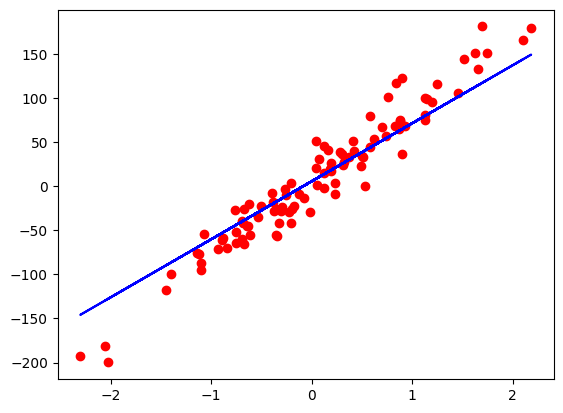

In [19]:
#training
num_epoch = 100
for epoch in range(num_epoch):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted,y)
  # backward pass
  loss.backward()
  # update parameters
  optimizer.step()
  optimizer.zero_grad()

  if epoch+1 % 10 ==0:
    print(f'epoca: {epoch+1},loss = {loss.item():.4f}')

predicted = model(X).detach().numpy() # convert to numpy aganin
  # we want to detach our tensor from the graph, because the tensor
  # has the requires gradients
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()

#Dataset and DataLoader

In [28]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [25]:
from google.colab import files

uploaded = files.upload()


Saving wine.csv to wine (1).csv


In [27]:
data = np.loadtxt('wine (1).csv',delimiter = ',')

In [31]:
class WineDataset(Dataset):
  def __init__(self):
    xy = np.loadtxt('wine (1).csv',delimiter = ',',dtype=np.float32)
    self.x = torch.from_numpy(xy[:,1:])
    self.y = torch.from_numpy(xy[:,[0]]) #n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples


In [33]:
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels )

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [34]:
# En lugar de lo anterior podemos hacer:
dataset = WineDataset()
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers=2 )

In [36]:
dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels )

tensor([[1.3110e+01, 1.9000e+00, 2.7500e+00, 2.5500e+01, 1.1600e+02, 2.2000e+00,
         1.2800e+00, 2.6000e-01, 1.5600e+00, 7.1000e+00, 6.1000e-01, 1.3300e+00,
         4.2500e+02],
        [1.1410e+01, 7.4000e-01, 2.5000e+00, 2.1000e+01, 8.8000e+01, 2.4800e+00,
         2.0100e+00, 4.2000e-01, 1.4400e+00, 3.0800e+00, 1.1000e+00, 2.3100e+00,
         4.3400e+02],
        [1.2640e+01, 1.3600e+00, 2.0200e+00, 1.6800e+01, 1.0000e+02, 2.0200e+00,
         1.4100e+00, 5.3000e-01, 6.2000e-01, 5.7500e+00, 9.8000e-01, 1.5900e+00,
         4.5000e+02],
        [1.4380e+01, 1.8700e+00, 2.3800e+00, 1.2000e+01, 1.0200e+02, 3.3000e+00,
         3.6400e+00, 2.9000e-01, 2.9600e+00, 7.5000e+00, 1.2000e+00, 3.0000e+00,
         1.5470e+03]]) tensor([[3.],
        [2.],
        [2.],
        [1.]])


In [37]:
# training loop

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)


178 45


In [39]:
for epoch in range(num_epochs):
  for i,(inputs,labels) in enumerate(dataloader):
    #forward, backward, update
    if(i+1) %5 ==0:
      print(f'epoch {epoch+1}/{num_epochs}, step = {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step = 5/45, inputs torch.Size([4, 13])
epoch 1/2, step = 10/45, inputs torch.Size([4, 13])
epoch 1/2, step = 15/45, inputs torch.Size([4, 13])
epoch 1/2, step = 20/45, inputs torch.Size([4, 13])
epoch 1/2, step = 25/45, inputs torch.Size([4, 13])
epoch 1/2, step = 30/45, inputs torch.Size([4, 13])
epoch 1/2, step = 35/45, inputs torch.Size([4, 13])
epoch 1/2, step = 40/45, inputs torch.Size([4, 13])
epoch 1/2, step = 45/45, inputs torch.Size([2, 13])
epoch 2/2, step = 5/45, inputs torch.Size([4, 13])
epoch 2/2, step = 10/45, inputs torch.Size([4, 13])
epoch 2/2, step = 15/45, inputs torch.Size([4, 13])
epoch 2/2, step = 20/45, inputs torch.Size([4, 13])
epoch 2/2, step = 25/45, inputs torch.Size([4, 13])
epoch 2/2, step = 30/45, inputs torch.Size([4, 13])
epoch 2/2, step = 35/45, inputs torch.Size([4, 13])
epoch 2/2, step = 40/45, inputs torch.Size([4, 13])
epoch 2/2, step = 45/45, inputs torch.Size([2, 13])


In [ ]:
torchvision.datasets.MNIST()
# fashion mnist


# Dataset Transform

In [41]:
import torch
import torchvision

In [43]:
class WineDataset(Dataset):
  def __init__(self, transform = None):
    xy = np.loadtxt('wine (1).csv',delimiter = ',',dtype=np.float32)
    self.x = torch.from_numpy(xy[:,1:])
    self.y = torch.from_numpy(xy[:,[0]]) #n_samples, 1
    self.transform = transform
    #self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample
    #return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

In [52]:
class ToTensor:
  def __call__(self, sample):
    inputs, target = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

In [47]:
class MulTransform:
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target

In [53]:
dataset = WineDataset(transform = None)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(),MulTransform(4)])
#dataset = WineDataset(transform = composed)

dataset = WineDataset(transform = composed)
#first_data = dataset[0]
#features, labels = first_data
#print(features)
#print(type(features), type(labels))


tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


TypeError: ignored

# FeedForward

In [55]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [58]:
print(device)

cuda


In [79]:
#hyper parameters
input_size = 784 #28*28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [61]:
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = torchvision.transforms.ToTensor(), download=True  )
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = torchvision.transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 109715815.81it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24935301.32it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25725221.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19803044.46it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [62]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = False)


In [64]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


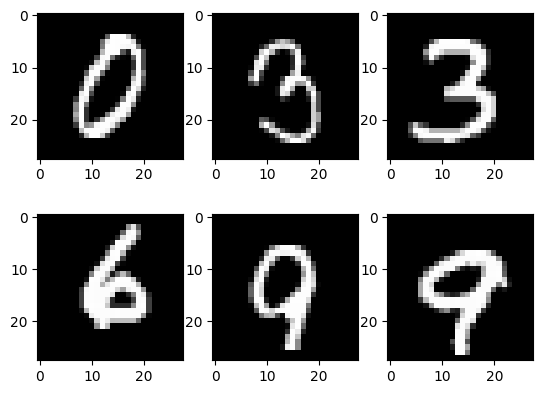

In [66]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap = 'gray')
plt.show()

In [74]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size,hidden_size,num_classes)
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [75]:
#loss and optimizer
criterion = nn.CrossEntropyLoss() # Apply softmax for us
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [80]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i ,(images, labels) in enumerate(train_loader):
    #100,1,28,28
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward

    outputs = model(images)
    loss = criterion(outputs,labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 ==0:
      print(f'epoch {epoch+1}/{num_epochs}, step = {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/5, step = 100/45, loss = 0.0439
epoch 1/5, step = 200/45, loss = 0.1119
epoch 1/5, step = 300/45, loss = 0.1775
epoch 1/5, step = 400/45, loss = 0.0753
epoch 1/5, step = 500/45, loss = 0.0539
epoch 1/5, step = 600/45, loss = 0.1945
epoch 2/5, step = 100/45, loss = 0.0493
epoch 2/5, step = 200/45, loss = 0.1221
epoch 2/5, step = 300/45, loss = 0.0477
epoch 2/5, step = 400/45, loss = 0.1143
epoch 2/5, step = 500/45, loss = 0.0543
epoch 2/5, step = 600/45, loss = 0.1381
epoch 3/5, step = 100/45, loss = 0.0877
epoch 3/5, step = 200/45, loss = 0.0557
epoch 3/5, step = 300/45, loss = 0.0890
epoch 3/5, step = 400/45, loss = 0.0380
epoch 3/5, step = 500/45, loss = 0.0447
epoch 3/5, step = 600/45, loss = 0.0249
epoch 4/5, step = 100/45, loss = 0.0723
epoch 4/5, step = 200/45, loss = 0.0213
epoch 4/5, step = 300/45, loss = 0.0446
epoch 4/5, step = 400/45, loss = 0.0708
epoch 4/5, step = 500/45, loss = 0.0194
epoch 4/5, step = 600/45, loss = 0.0275
epoch 5/5, step = 100/45, loss = 0.0282


In [92]:
# test
with torch.no_grad():
  n_correct = 0
  n_sample = 0
  num = 0
  print(n_samples)

  for images,labes in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #value,index
    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    #print(n_samples)
    n_correct += (predictions==labels).sum().item()
    #print(n_correct)
    num+=1
  #print(n_correct)
  #print(num)
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy: {acc}')

90100
90200
7
90300
19
90400
25
90500
31
90600
42
90700
53
90800
62
90900
79
91000
84
91100
94
91200
101
91300
110
91400
121
91500
128
91600
136
91700
147
91800
152
91900
164
92000
177
92100
192
92200
197
92300
207
92400
218
92500
227
92600
236
92700
248
92800
257
92900
265
93000
276
93100
285
93200
293
93300
300
93400
311
93500
320
93600
336
93700
348
93800
360
93900
371
94000
376
94100
384
94200
388
94300
401
94400
408
94500
415
94600
426
94700
433
94800
443
94900
451
95000
462
95100
476
95200
485
95300
491
95400
507
95500
517
95600
528
95700
539
95800
548
95900
556
96000
562
96100
569
96200
580
96300
591
96400
605
96500
613
96600
622
96700
631
96800
638
96900
653
97000
663
97100
674
97200
686
97300
700
97400
712
97500
721
97600
738
97700
744
97800
749
97900
760
98000
770
98100
785
98200
798
98300
806
98400
814
98500
828
98600
836
98700
845
98800
853
98900
864
99000
875
99100
889
99200
905
99300
914
99400
919
99500
929
99600
942
99700
952
99800
969
99900
978
100000
987
100100
999
100